# Introduction to Numerical Methods in Macroeconomics and Python

## Numerical Methods: what are they and why do we need them

In Macroeconomics we are often asked to solve for the equilibrium of a model.
A model consists of a system of (often nonlinear) equations in some unknowns.
Because of nonlinearities, it is often difficult or impossible to obtain closed-form solutions.
We do not want to keep talking about models we can solve analytically, because that would be quite a restricted set of models.
Therefore, we need numerical methods to explore the solutions to complicated models.

These TA sessions focus on exploring some popular numerical methods that are useful in Macroeconomics.
We will focus on discrete-time models, as these present non-trivial challenges relative to models in continuous-time.

Broadly speaking, we can categorize solutions methods in two families:

- perturbation methods; and
- projection methods.

### Perturbation methods

For nonlinear models that feature smooth functions, we can get fast and efficient solutions by approximating the system of equations around some specific point.
We can write any rational-expectations model in the following way:
$$
\mathbf{E}_t \left( f \left( X_{t-1}, X_{t}, X_{t+1} \right) \vphantom{\sum}\right) = 0,
$$
The solution to such a system of equations (assuming it exists and it is unique) is written as
$$
X_{t+1} = g \left( X_{t}, X_{t-1} \right),
$$
where $g(\cdot)$ is a set of policy functions.

What we can do with such a system is to take a Taylor expansion of $f(\cdot)$ around a point.
It is common to consider the first-order approximation (denote it with $\hat{f}$) around the deterministic steady state of the model.
Instead of solving $f=0$, we can solve $\hat{f}=0$.
As this new system is linear, we know we can easily solve it: the solution will be a linear policy function $\hat{g}$ that will hold only in an arbitrary (small) neighborhood of the steady state.

For example, we know how to analytically solve the textbook version of the RBC model with full capital depreciation (i.e., $\delta=1$).
If $\delta \neq 1$, then we need to use numerical methods.

In this course, we will not deal with perturbation methods.
We will go hands-on with them in the next Macro course.

If we introduce discontinuities or non-differentiable equations in the model (e.g., borrowing constraints or discrete control variables), we cannot reliably take the Taylor expansion of a model.
This justifies the interest in projection methods to solve models.

### Projection methods

Projection methods try to force their way through a solution, mostly through a trial-and-error procedure.
The intuition is very similar to the [Newton algorithm](https://en.wikipedia.org/wiki/Newton%27s_method) to find roots of a function: you start with a proposal for the solution and you check if it works.
If it does not, then you use some (educated) criterion to create a new proposal.
You repeat the procedure until you arrive to the solution.

The difficulty in the case of Macroeconomics is that the proposals we are dealing with are not points in a space of scalars, but are points in a space of functions.
This might not be clear at first, as we are going to work with numerical representations of functions.

The clearest application of the projection method is probably the Aiyagari (1994) model.
In such model, we should find a capital-remuneration rate $r_t$ such that all markets (goods, labor, capital) are in equilibrium.
We will see the details in a dedicated TA session, but here is the gist of it.
We enter the $n$-th iteration with a proposal $r_{t}^{(n)}$.
We check if it clears the capital market: 
- if it does not because there is excess demand, we know we should have $r_{t}^{(n+1)} > r_{t}^{(n)}$.
- if it does not because there is excess supply, we know we should have $r_{t}^{(n+1)} < r_{t}^{(n)}$.

A common critique to projection methods is the following: it is often the case that we cannot verify the solution we reach is unique (e.g., sunspots).
So it might happen that you have models where the procedure never converges anywhere, or where the procedure converges to "weird" solutions.
A way to deal with this is to carry out extensive (and sometimes painful) sensitivity analysis.

### Notable, classical examples

- The deterministic Neoclassical Growth Model
- The stochastic Neoclassical Growth Model
- <a href="https://doi.org/10.1016/0165-1889(93)90024-M">Huggett (1993)</a>
- [Aiyagari (1994)](https://doi.org/10.2307/2118417)
- [Krussell and Smith (1998)](https://doi.org/10.1086/250034)
- [Reiter (2009)](https://doi.org/10.1016/j.jedc.2008.08.010)

## Python

### Introduction

Python is a programming language.
It is not a mathematics-oriented language in and of itself.
It is a general-purpose language, meaning we can do pretty much what we want with it.
Here is a list of what humanity did with Python:

- Dropbox (Source: [Dropbox Blog](https://blogs.dropbox.com/tech/2018/09/how-we-rolled-out-one-of-the-largest-python-3-migrations-ever/))
- Image editing ([The GNU Image Manipulation Program](https://www.gimp.org/))
- Vector graphics ([Inkscape](https://inkscape.org/))
- 3D modeling ([Blender](https://www.blender.org/))
- Desktop publishing ([Scribus](https://www.scribus.net/))
- Web pages ([Reddit](https://www.reddit.com/), Source: [Reddit Blog](https://redditblog.com/2005/12/05/on-lisp/))

We could spend ages trying to understand all the details on how Python works, and it is very easy for me to get lost in technical explanations.
Instead, let's have a look at the very simple things Python allows us to do.

In [1]:
2 + 1 - 7

-4

In [2]:
3 * 2 / 4

1.5

In [3]:
print('Hello world!')

Hello world!


In [4]:
print("'This' is a string")

'This' is a string


In [5]:
print('The Answer to the Ultimate Question of Life, The Universe, and Everything is 6 * 9 = 42 (although 6 * 9 = {})'.format(6*9))

The Answer to the Ultimate Question of Life, The Universe, and Everything is 6 * 9 = 42 (although 6 * 9 = 54)


In [6]:
print('This ---> {}\nis a list'.format(['a', 'b', 'c']))

This ---> ['a', 'b', 'c']
is a list


In [7]:
print('This ---> {}\nis a tuple'.format(('a', 'b', 'c')))

This ---> ('a', 'b', 'c')
is a tuple


In [8]:
print('This ---> {}\nis a dictionary'.format({'a': 1, 'b': 2, 'c': 3}))

This ---> {'a': 1, 'b': 2, 'c': 3}
is a dictionary


### Data types

Python comes with some basic data types.
Among those, notable ones are:

- integer number (`int`)
- floating point number (`float`)
- complex number (`complex`)
- boolean value (`bool`)
- string (`str`)
- list (`list`)
- tuple (`tuple`)
- dictionary (`dict`)

There are many other data types, but these are the most prominent ones and share much in common with others that we do not mention here

Integers, floating point number and complex numbers are the only representation of numbers Python is aware of.
Vectors and matrices are not defined in "core" Python.

In [9]:
a = -2      # int
b = 5.2     # float
c = 1 + 3j  # complex

Note that whenever we enter a value with a dot (`.`), Python interprets it as a floating point number.
For example:

In [10]:
type(1.)

float

In [11]:
type(1)

int

We have already seen strings.
These are either denoted with a single quote (`'`) or with a double quote (`"`).
We can use both, as long as we are consistent with them.
This means that a single (double) quote can only close a matching single (double) quote.
We can also mix them.

In [12]:
print("This is string using 'single quotes' as characters and not delimiters.")
print('This instead is a string using "double quotes" as characters and not delimiters.')

This is string using 'single quotes' as characters and not delimiters.
This instead is a string using "double quotes" as characters and not delimiters.


Finally, lists, tuples and dictionaries are collections of other objects.
We can nest them as we like.
These are also referred to as _iterables_, because we can "walk" them with a `for` loop (see _control flow_ below).

In [13]:
l = [a, 'a', 'ciao']                 # list with square brackets
t = (a, 'a', 'ciao')                 # tuple with round parentheses
d = {'x': a, 'y': 'a', 'z': 'ciao'}  # dict with curly braces

The difference bewteen a `list` and a `tuple` is that the former supports item assignment, while the latter does not.
This means that we cannot modify a single element in tuples without having to recreate the tuple from scratch.

In [14]:
l[0] = b
l

[5.2, 'a', 'ciao']

In [15]:
t[0] = b

TypeError: 'tuple' object does not support item assignment

Finally, a dictionary is just like a list, except that we can reference its items by using their _key_ instead of using an index.
Dictionaries are also referred to as _key-value_ or _name-value_ pairs, because each value is attached to a key/name.

In [16]:
d['x']

-2

The most common use-case for tuples (as opposed to lists) is for collections that are semantically ordered.
For example, the set of indexes for a matrix lends itself to being represented with a tuple, because the first element semantically represents a row index, while the second semantically represents a column index.

Finally, we have boolean values, representing truth (`True`) or otherwise (`False`).
Important operators for boolean values are `and`, `or` and `not`.

In [17]:
True

True

In [18]:
False

False

Integers and floating point numbers are objects representing numerical values.
Their difference goes back to their technical representation in the system memory.
Unsigned integers (that are not too big) are simply represented using their binary representation (i.e., a simple change of base), while unsigned floating point numbers are represented in three parts: a significand, a base and an exponent.
More info on this at the [Wikipedia page](https://en.wikipedia.org/wiki/Double-precision_floating-point_format).

Using the right data type is not fundamental.
If an operation needs to turn an integer into its floating point representation, Python will take care of this for us under the hood.
However, choosing the right data type might provide a speed improvement when _many_ numbers need to be _casted_ into another type.

#### Strongly typed and weakly typed languages

Python uses weak typing, as opposed to strong typing.
This means that Python will try to figure out that type each variable is based on context.
For example, writing `a = 1` implies that `a` is of type `int`.
Writing `b = 1.0` implies that `b` is of type `float`.
This is handy because we do not have to declare the type of the variable before assigning a value to it.
Languages like C are strongly typed, meaning that first you declare what type the variable is.
Only then you can assign a value to it.

However, weak typing has its drawbacks.
It can backfire because certain operators perform different actions depending on the type of the variable.
A classical example is the `+` operator.
If you feed it with two numeric values, then the result will be the algebraic sum of those numbers.
If you feed it with two strings, then it performs string concatenation.
If you feed the `+` operator with mixed types, then it may be ambiguous what the result should be.
In this case, Python will complain.

In [19]:
1 + 1

2

In [20]:
1 + 1.0  # mixing numeric types is ok

2.0

In [21]:
"a" + "b"

'ab'

In [22]:
1 + "1"

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [23]:
['a', 'b'] + ['c']  # can concatenate two lists

['a', 'b', 'c']

In [24]:
['a', 'b'] + 'c'

TypeError: can only concatenate list (not "str") to list

### Methods

Methods are, by all means, functions.
What's special about them is that they come "embedded" with each object and are guaranteed to work with that object.
Methods are accessed by writing the object, appending a full-stop (`.`) and then writing the name of the method.
For example, `float.as_integer_ratio()`.

We have already used a method above.
Each `str` object has a method `format()`, which subsitutes placeholders with content from other variables.
For example, we can print a message using a value from a variable.

In [25]:
print("The variable 'a' has value {}.".format(a))

The variable 'a' has value -2.


Another example, every `complex` object comes with two important methods: `real` and `imag`.
Their meaning is self explanatory.

In [26]:
print("The variable 'c' is of type {} and contains the value {}.".format(type(c), c))
print("The real part of 'c' is {}, while the imaginary part is {}.".format(c.real, c.imag))

The variable 'c' is of type <class 'complex'> and contains the value (1+3j).
The real part of 'c' is 1.0, while the imaginary part is 3.0.


### Functions and anonymous functions

Functions are useful because they pack code in one convenient _callable_.
We can define a function using the `def` statement.

In [27]:
def sqrt(x):
    return x ** (1/2)

Notice two things.
First, the statement `def` is followed by the name of the function we are defining and by the list of input arguments.
Then, there is a colon (`:`).
Second, all the code that belongs to the function is indented with four whitespaces (not more, not less and, more importantly, not tabs (`\t`).

The `return` statement tells Python to return the value to the caller of the function.
This way, if we write `y = sqrt(2)`, the value of `y` is the returned value of the function `sqrt`.
If we were to forget the `return` statement, the value of `y` would be `None`, because the function would not be explicitly instructed to return anything.

Functions can defined in a recursive way.
An example of such behavior would be the following function: it returns the `n`-th element of the Fibonacci sequence.

In [28]:
def fibonacci(n):
   if n <= 1:
       return n
   else:
       return(fibonacci(n-1) + fibonacci(n-2))
    
[fibonacci(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

<sup>
    The last line is a <i>list comprehension</i>.
    It defines a list with a <code>for</code> loop in one line.
</sup>

Finally, functions can be [anonymous](https://en.wikipedia.org/wiki/Anonymous_function).
These are functions that are not bound to an identifier (i.e., a name).
This is useful when passing such anonymous function as input arguments to other functions.

In [29]:
some_integers = list( range(10) )
even_integers = list( filter(lambda x: x % 2 == 0, some_integers) )
even_integers

[0, 2, 4, 6, 8]

Anonymous function always follow the syntax `lambda <arg>: <return_value>`.
In the example above, the anonymous function returns `True` if the remainder of the floor division operator (also known as `mod` operator, denoted with `%` in Python) is zero.

### Control flow

Control flow is the set of techniques that regulate how code is executed.
Notable examples are the `if`, `for` and `while` statements.
However, we can also define what happens when we find erratic behavior, such as a "bad" input argument.
We can even decide what to do in case an error occurs, too!

- `if` executes code provided a condition holds.
- `for` executes code for a given number of times.
- `while` executes code up until a condition is verified.
- `raise` issues an exception (an error) and interrupts the execution of a function.
- `try` attempts to execute something, allowing for alternative measures in case an error is raised.

Obviously, all of these can be nested.

The `if` statement allows for the `elif` (else, if) and `else` clauses.

In [30]:
if isinstance(a, int) or isinstance(a, float):
    if a > 0:
        print("The variable 'a' has a positive value.")
    elif a < 0:
        print("The variable 'a' has a negative value.")
    else:
        print("The variable 'a' has a null value.")
else:
    print("The variable 'a' contains either a complex number or not a numeric value.")

The variable 'a' has a negative value.


The `for` statement runs a chunk of code a predetermined number of times.

In [31]:
for i in range(5):
    print("{}".format(i))

0
1
2
3
4


The `while` statement runs a chunk of code as long as a condition is verified.

In [32]:
s = 1
while s < 4:
    print("{}...".format(s))
    s += 1
print("Stella!")

1...
2...
3...
Stella!


The `raise` statement interrupts a function and raises an exception (an error).
This is particularly useful when we write a function and we want to check that the input argument(s) are suitable (e.g., are of the correct data type).

In [33]:
def real_nth_root(x, n):
    if not ( isinstance(x, int) or isinstance(x, float) ):
        raise TypeError("Input argument has to be numeric.")
    elif isinstance(x, complex):
        raise TypeError("Cannot take the real root of a complex number.")
    else:
        if not isinstance(n, int):
            raise ValueError("Cannot take non-integer roots of 'x'.")
        elif x < 0:
            raise ValueError("Cannot take the real root of a negative number.")
        else:
            return x ** (1/n)

In [34]:
real_nth_root('a', 1)

TypeError: Input argument has to be numeric.

In [35]:
real_nth_root(-3, 1)

ValueError: Cannot take the real root of a negative number.

In [36]:
real_nth_root(27, 3)

3.0

In [37]:
n = 3.7
try: 
    real_nth_root(27, n)
except ValueError:
    real_nth_root(27, n//1)

ValueError: Cannot take non-integer roots of 'x'.

<sup>
The information displayed when we encounter an error is called <i>stack trace</i> and contains <i>call stack</i>, i.e., the sequence of functions that have been called up until the error occurred. This is useful for debugging: we know where the error originated and why.
</sup>

#### Operations with numeric values

| Operator/Method | Meaning | Example | Notes |
|:----------------|:--------|:--------|:------|
| `+` | Sum | `1 + 1` = `2` | |
| `-` | Subtraction | `1 - 1` = `0` |  |
| `*` | Multiplication | `1 * 2` = `2` |  |
| `/` | Division | `3 / 2` = `1.5` | Always returns `float` | 
| `//` | Floor division | `3 // 2` = `1` | Always returns `int` |
| `%` | Remainder of floor division (mod) | `5 % 2` = `1` |  |
| `**` | Exponentiation | `3 ** 2` = `9` | Convention: `0 ** 0` = `1` |
| `abs()` | Absolute value | `abs(-3)` = `3` | Returns magnitude for `complex` |
| `complex.conjugate()` | Conjugate number (for complex) | `(4-3j).conjugate()` = `4+3j` | |
| `>` | Greater than | `3 > 1` = `True` | |
| `>=` | Greater than or equal | `4 >= 4` = `True` | |
| `<` | Less than | `3 < 1` = `False` | |
| `<=` | Less than or equal | `4 <= 4` = `True` | |
| `==` | Equal | `3 == 3.0` = `True` | Works with `str`, too |
| `!=` | Not equal | `3.1 == 3.0` = `False` | Works with `str`, too | 
| `is` | Object identity | `3 is 3.0` = `False` | Works with all objects |

#### Operations with non-numeric values

| Operator/Method | Meaning | Example |
|:----------------|:--------|:--------|
| `and` | Applies logical _and_ to booleans | `True and False` = `False` |
| `or` | Applies logical _or_ to booleans | `True or False` = `True` |
| `not` | Applies logical negation to booleans | `not True` = `False` |
| `zip` | Zips together two lists | `zip(['a', 'b'], [1, 2])` = `[('a', 1), ('b', 2)]` |
| `map` | Applies function to all elements of iterable | `map(lambda x: -x, [1, 2])` = `[-1, -2]` |
| `filter` | Returns only elements from iterable respecting a condition | `filter(lambda x: x>0, [-1, 0, 1])` = `[1]` |
| `list.append(<arg>)` | Appends `<arg>` to the end of the list | `([1, 2]).append(3)` = `[1, 2, 3]` |
| `list.pop(n)` | Returns `n`-th element of list, removes it from list | `([1, 2, 3]).pop(-1)` = `3` (leaves `[1, 2]`) |
| `dict.pop(<key>)` | Same as `list.pop(n)` | |
| `list.remove(<arg>)` | Removes `<arg>` from list, returns nothing | `([1, 2]).remove(2)` = `None` (leaves `[1]`) |

### A hands-on example: approximating $e$

Let's approximate Euler's constant $e$.
One definition is

$$
e \equiv \lim_{n \to \infty} {\left( 1 + \frac{1}{n} \right)}^n.
$$

We cannot possibly compute such limit in a computer, because taking $n$ to infinity requires infinite time, and nobody ain't got that.

What we can do, is compute the following quantity:

$$
\hat{e}^{(m)} = {\left( 1 + \frac{1}{m} \right)}^m
$$

for given values of $m$.
Then, we compare $e^{(m)}$ and $e^{(m+1)}$.
If their difference is "big enough", then we are far from the convergence point (the limit).
If their difference is "small enough", then we can claim to have approximated $e$.

A way to do this is the following.

In [38]:
from time import time  # see modules, below

def approx_e(tol=1e-6, return_full_sequence=False, print_info=False, step_increase=1):
    improvement = 1.0
    m = 1
    results = [1.0]
    
    t0 = time()
    
    while improvement > tol:
        tentative = (1 + (1/m))**m
        results.append(tentative)
        improvement = abs( results[-1] - results[-2] )
        m += step_increase
    
    t1 = time()
    
    if print_info:
        print("No. of iterations: {}.\nTime elapsed: {:.3f} seconds.".format(m, t1-t0))
    
    if not return_full_sequence:
        return results[-1]
    else:
        return results

The function `approx_e` takes some arguments.
Python allows us to specify default arguments as above, by declaring the name of the input argument and assigning a default value (`def foo(in1=default1, in2=default2)`).

In [39]:
approx_e(print_info=True)

No. of iterations: 1167.
Time elapsed: 0.001 seconds.


2.717117100087719

In [40]:
approx_e(tol=1e-10, print_info=True)

No. of iterations: 94761.
Time elapsed: 0.072 seconds.


2.7182674855879516

In [41]:
approx_e(tol=1e-50, print_info=True)

No. of iterations: 2646517.
Time elapsed: 2.179 seconds.


2.7182813149249223

### The need for modules

Modules are sets of functions and classes that are oriented towards a given goal.
Say you have a bunch of functions that altogether serve one purpose (e.g., connect to a website and download stuff acccording to some criteria).
Then your bunch may be collected into a module.
Packages are sets of modules.

Here are some packages we, as economists, will encounter most often:

- [`numpy`](https://www.numpy.org/) (N-dimensional arrays)
- [`scipy`](https://www.scipy.org/) (mathematical and statistical recipes)
- [`pandas`](https://pandas.pydata.org/) (dataframes, as in R or Stata)
- [`matplotlib`](https://matplotlib.org/) (plotting)
- [`beautifulsoup4`](https://www.crummy.com/software/BeautifulSoup/) (HTML web scraping)
- [`selenium`](https://docs.seleniumhq.org/) (Chrome-driven web scraping)
- [`bokeh`](https://bokeh.pydata.org/) (interactive data visualization)

How you install these packages in your computer depends on your Operating System.
If you have a Windows or macOS machine, then you are most likely using the Anaconda distribution, which bundles most packages and hence they should already be on your computer.
If you use a Debian-based Linux distribution, you may want to check out your package manager for these modules.

If your package distribution (e.g., Anaconda, APT) does not give you access to a given module, you can use `pip`, which is Python's integrated package manager.

#### How do we use modules/packages?

At the very beginning of your `.py` file, you should include `import` statements.
These statements instruct the Python interpreter to use definitions that are found in those packages.
Note that you can also use shorthands for accessing functions inside modules.

In what follows, we see some notable packages and some of their functions.
The point here is not to teach everything you need about all the packages.
This is just to show minimal working examples, so to get familiar with syntax and some basic functions.

### NumPy

Python does not know what a vector or a matrix are.
The goal of NumPy is to add support for multi-dimensional arrays, together with basic mathematical functions.
In other words, NumPy brings basic Matlab-like functionality to Python.

Here are a few examples of how to use NumPy.

First, we have to tell Python that it has to load the package using an `import` statement.
We also use a shorthand to refer to NumPy functions in upcoming calls.

In [42]:
import numpy as np

Next, we create some arrays from scratch, using the `list` datatype as closest representation to what we want.

In [43]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

This is a one-dimensional vector in NumPy.
It has no concept of row or column.

In [44]:
a.shape

(3,)

We can create two-dimensional arrays where one of the dimensions has size one in order to create row- or column-oriented vectors.

In [45]:
a.reshape([3, 1])

array([[1],
       [2],
       [3]])

In [46]:
a.reshape([1, 3])

array([[1, 2, 3]])

Here we also see how a matrix can be constructed starting from lists.
We do this by nesting lists: the "outermost" list groups rows in the matrix, while the "innermost" list groups elements in each row (effectively characterizing columns).

In [47]:
A = np.array([[100, 200, 300, 400],
              [ 50,  75,- 10,- 15],
              [  9,   8,   7,   6]], dtype=float)
A

array([[100., 200., 300., 400.],
       [ 50.,  75., -10., -15.],
       [  9.,   8.,   7.,   6.]])

Note that I specified the datatype (`dtype`) of all entries of the matrix `A` to be floating point numbers (as opposed to integers).
We can add static typing to our variables to improve performance of our algorithms, so that Python will not have to spend CPU cycles trying to infer the type of objects it is working with.

In [48]:
A.shape

(3, 4)

To access elements within a matrix we use the square brackets.

In [49]:
A[0, 3] = np.nan
A

array([[100., 200., 300.,  nan],
       [ 50.,  75., -10., -15.],
       [  9.,   8.,   7.,   6.]])

Note that indexing in Python is `0`-based: the number `0` represents the first element in an iterable object (e.g., a list, a matrix, etc.).
This means that for a matrix with dimensions `N`-by-`M`, we can refer to specific items using integers ranging from `0` to `N-1` for the rows, from `0` to `M-1` for the columns.

Note that Python supports "backward" indexing:

In [50]:
A[-1, -2]

7.0

The previous command looks for the element in the _last_ row, _second-to-last_ column of `A`.

NumPy supports a number of standard functions to create arrays that are somewhat regular.
Notable examples are empty matrices (`np.empty`), arrays full of zeros (`np.zeros`), arrays full of ones (`np.ones`), linearly, of logarithmically-spaced vectors (`np.linspace` and `np.logspace`), mesh grids (`np.mesh`) and so on.

In [51]:
n = 10+1
xLo = 0
xHi = 2
X = np.linspace(xLo, xHi, n)
X

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

It also provides mathematical functions that Python does not know, such as `np.sqrt`, `np.sin`, `np.log`, etc.

In [52]:
Y = np.sqrt(X)
np.hstack( [ X.reshape([-1, 1]), Y.reshape([-1, 1]) ] )

array([[0.        , 0.        ],
       [0.2       , 0.4472136 ],
       [0.4       , 0.63245553],
       [0.6       , 0.77459667],
       [0.8       , 0.89442719],
       [1.        , 1.        ],
       [1.2       , 1.09544512],
       [1.4       , 1.18321596],
       [1.6       , 1.26491106],
       [1.8       , 1.34164079],
       [2.        , 1.41421356]])

Notably, NumPy also provides functions to draw random variates from known distributions via the `random` sub-package.

For example, to create a `3`-by-`3` matrix where each element is drawn from a $\mathcal{N}(0, 5)$...

In [53]:
B = np.random.normal(loc=0, scale=5, size=(3, 3))
B

array([[-2.61495219,  0.10092213,  1.22916732],
       [ 1.32341644,  6.73802453, -0.89480062],
       [13.97173816, -7.10273311,  1.08795183]])

For now, this is all we need to know: NumPy brings multidimensional arrays and basic mathematical functions to Python, essentially approximating what Matlab can do (without its toolboxes).

However, we're missing mathematical and statistical routines (e.g., root-finding solver, statistical describer for arrays).
This is where SciPy comes in.

### SciPy

SciPy is a package that contains many mathematical and statistical routines.
Examples include
- [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html) (support for [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix))
- [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) (linear algebra tools)
- [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html) (tools dealing with the Fast Fourier Transform)
- [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) (optimization and root-finding routines)
- [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) (statistical functions, including random number generators)
- [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) (interpolation facilities)
- [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) (stuff for signal processing)

It is common to import sub-packages from SciPy rather than importing the upper-level SciPy package.

For example, we can compute the eigenvalues `l` and (left) eigenvectors `v` of the matrix `B`:

In [54]:
from scipy import linalg as la

l, v = la.eig(B)
l

array([-5.58486182+0.j,  3.02289332+0.j,  7.77299268+0.j])

With the `stats` package we can describe arrays:

In [55]:
from scipy import stats as st

description = st.describe( np.random.uniform(low=-1, high=1, size=(3, 5)) )

In [56]:
description

DescribeResult(nobs=3, minmax=(array([ 0.07954349, -0.33426631,  0.18175866,  0.2023076 ,  0.52275151]), array([0.53600671, 0.29509936, 0.70089246, 0.69161232, 0.93477842])), mean=array([0.27373802, 0.02503923, 0.42369168, 0.41423446, 0.66553362]), variance=array([0.05556524, 0.10499885, 0.06830784, 0.06306765, 0.05443615]), skewness=array([ 0.48629284, -0.46759557,  0.24338768,  0.44627339,  0.70321688]), kurtosis=array([-1.5, -1.5, -1.5, -1.5, -1.5]))

In [57]:
description.nobs

3

In [58]:
description.skewness

array([ 0.48629284, -0.46759557,  0.24338768,  0.44627339,  0.70321688])

It would be very long and complicated to showcase the functions in SciPy, as there are a lot.
We will rather encounter SciPy functions as we go through the course.
An exhastive list of sub-packages can be found [here](https://docs.scipy.org/doc/scipy/reference/#api-reference).

### Pandas

In [59]:
import pandas as pd

Pandas is a package that defines a handy `DataFrame` object.
If you are familiar with R, you already know what this object is.
If you are familiar with Stata, instead, this package allows you to nicely tabulate data in the same way.

To explore some examples, let's use a sample dataset.
A popular choice is the Tips dataset, which includes information about tips restaurants collect from customers.
This is available in CSV format online.
We can import CSV data using the `pandas.read_csv()` function.

In [60]:
tips = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv')

In [61]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can summarize specific variables.

In [62]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

We can collapse the data grouping by categories.

In [63]:
tips.groupby('smoker').sum()

,total_bill,tip,size
smoker,,,
No,2897.43,451.77,403
Yes,1930.34,279.81,224


We can also create fancy plots on the fly.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251BC0E5C48>,
      dtype=object)

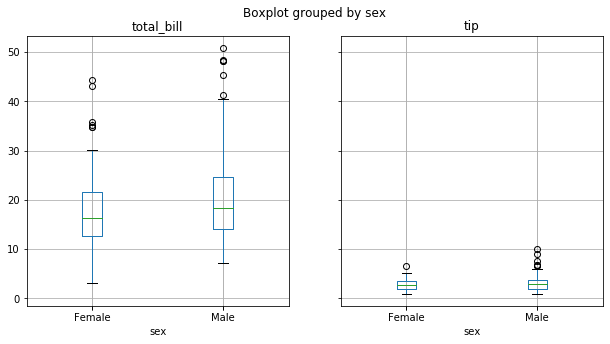

In [64]:
tips.boxplot(column=['total_bill', 'tip'], by='sex', figsize=(10,5))  # figsize in inches

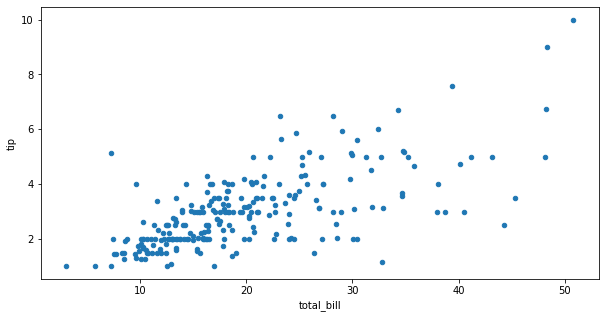

In [65]:
tips.plot.scatter(x='total_bill', y='tip', figsize=(10,5))

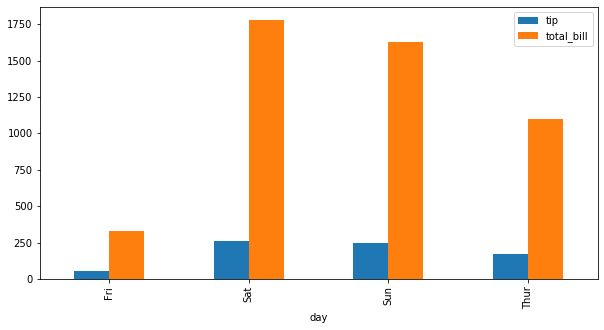

In [66]:
tips.groupby('day').sum().plot.bar(y=['tip', 'total_bill'], figsize=(10,5))

In [67]:
tips.to_numpy()

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

Looking at all features of pandas is outside the scope of this tutorial.

### Matplotlib

Whenever you have complicated objects in your code, it is quite convenient to visualize them.
Matplotlib provides a way to plot 2D objects, and is of (limited) use for 3D plotting.

Above we computed the values implied by `np.sqrt` on a set `X`.
What we can do is plot them.

In [68]:
from matplotlib import pyplot as plt

The `pyplot` sub-package has all (or almost all) the front-end functions we want to use for 2D plotting.
We will rarely need functions in other sub-packages of Matplotlib.

As in Matlab, we distinguish two main objects in a plot: the _figure_ and the _axes_.
We can think of the figure as the box that contains the chart, while we can think of the axes as the main graphical objects that constitute the plot (this is a MASSIVE over-simplification, but we will be fine for the scope of this course).

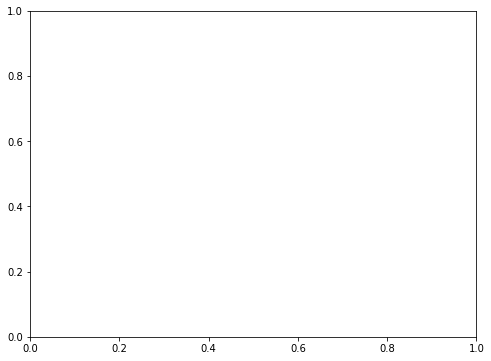

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

What we just did here is to create the two objects figure and axes.
We also specified the size, in inches, that the figure will be characterized by.
This is useful when you will need to save the figure to a file on disk.

As we can see, Matplotlib (together with Jupyter, the renderer for this notebook) gave back a graphical representation of what we have: nothing.
We have to instruct the axes object to put together the vectors `X` and `Y` that we defined above.

In [70]:
ax.plot(X, Y, color='red', linewidth=1.0, linestyle='solid')

Now our plot has the data to be visualized.
However, the axes object has no graphical ability, in the sense that the screen is not showing the plot.
We have to go back to the figure object

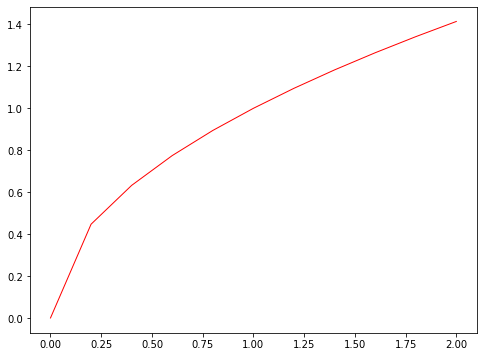

In [71]:
fig

This most certainly resembles the graph of $y=\sqrt{x}$, but it is a bit rough.
This happens because we specified `n = 11` points for the grid for `X`.
To make the graph smoother (hence more appealing to the eyes), we have to recompute the function on a denser set of points.

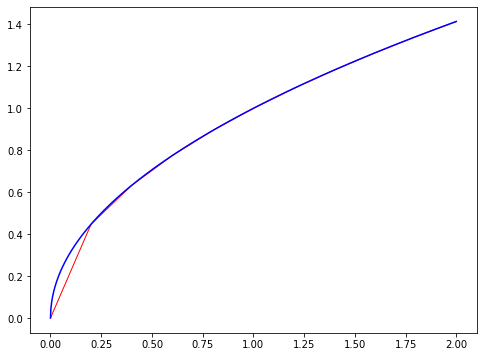

In [72]:
n=1000+1
X = np.linspace(xLo, xHi, n)
Y = np.sqrt(X)

ax.plot(X, Y, color='blue', linewidth=1.5, linestyle='solid')
fig

As we can see, the new blue line is much smoother than the red line, and this happens because we increase the number of points at which we evaluate the function.
Note that the "smoothing" effect is most noticeable where the function is "most concave" (or convex).

We can also decorate the plot by adding axes labels and a title.

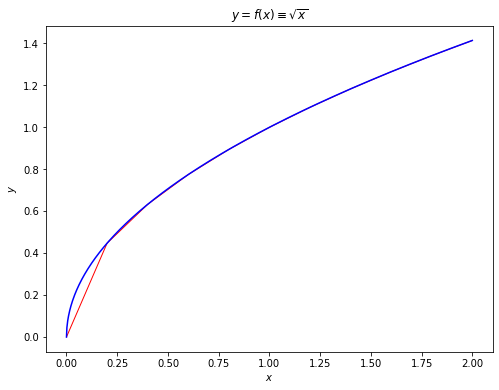

In [73]:
ax.set_xlabel(r'$x$')  # using LaTeX syntax
ax.set_ylabel(r'$y$')  # using LaTeX syntax
ax.set_title(r'$y=f(x)\equiv\sqrt{x}$')  # the 'r' prepending the string escapes backslashes
fig

We can also add arbitrary horizontal and vertical lines, which is useful if we want to highlight specific points in the plot.

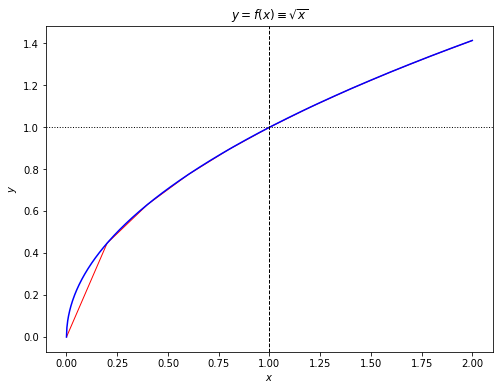

In [74]:
ax.axvline(1, color='black', linestyle='dashed', linewidth=1)
ax.axhline(1, color='black', linestyle='dotted', linewidth=1)
fig

Finally, a notable feature here is saving a figure to disk, which is useful if you want to include the plot in a paper or a slide.
We can do this by using `fig.savefig('destination_folder/filename.extension')`, where `extension` can be PDF, EPS, PNG, JPG, etc.
Matplotlib automatically recognizes the extension (as long as it is a valid and supported graphic format) and takes care of all the encoding necessary.

This is all we need for plotting with Python (at least at the moment).

There is a small catch regarding the use of Matplotlib in conjunction with other tools.
This webpage is generated by a tool call Jupyter.
The interpreter executing the Python commands is called IPython, which is an enhanced command-line (interactive) interpreter that also runs in Spyder (the IDE we use in class).
IPython by default loads special support for graphs, such that the plot is visualized inside the console whenever a figure object is created or called.
This is not standard behavior for Matplotlib alone.
If you are developing code without IPython (most commonly, without Jupyter/Spyder), you can spawn a window containing the plot by using the `plt.show()` command.
This creates a stand-alone window with the plot and pauses the execution of any remaining code after it until the window is closed (unless you use `plt.show(block=False)`, which is still an experimental feature of Matplotlib).



P.s.: do you have LaTeX installed on your machine and want to use LaTeX fonts in your plots for beautiful papers and slides?
Use `matplotlib.rc('text', usetex=True)`.

### Classes (objects)

The notable feature of Python relative to Matlab and Stata is that we can define our own objects.
Think of an object as a container for custom data and custom functions which work for any instance of the custom data.
If we know something about the data and what can be done with it, we can standardize the procedures by defining a `class`.

Here is a (crude) example.

In [75]:
class OLS(object):

    def __init__(self, y, x, const=True):

        self.y = y
        self.n = y.shape[0]

        if const:
            self.X = np.concatenate((np.ones((self.n, 1)), x), axis=1)
        else:
            self.X = x

        self.k = self.X.shape[1]

        if self.n < 10000:
            Q, R = la.qr(self.X, mode='economic')
            self.xxi = la.solve(R.T @ R, np.eye(self.k))
        else:
            self.xxi = la.solve(self.X.T @ self.X, np.eye(self.k))

        self.beta = self.xxi @ (self.X.T @ self.y)
        self.u = self.y - self.X @ self.beta
        self.sigma2 = (self.u.T @ self.u) / (self.n - self.k)
        self.se_beta = np.sqrt(self.sigma2 * np.diag(self.xxi).reshape((-1,1)))

    def r2(self, adj=False):
        rss = ( np.squeeze( self.u.T @ self.u ) ).item()
        tss = ( np.squeeze( self.y.T @ self.y ) ).item()
        r2 = 1 - rss/tss

        if not adj:
            return r2
        else:
            return 1 - (1-r2) * ((self.n - 1) / (self.n - self.k))

Here, the class `OLS` has two methods: `__init__` and `r2`.
The first method is common to all classes: it 
1. defines what happens everytime we create an instance of the class, and 
2. allows the user to properly provide instance data to the instance of the object.
The way we use the object is simply by calling it by name.

Everything that is assigned to `self` is accessible from the outside.
Let's see an example.

In [76]:
# Creating random data (x, y), where y is approximately a linear function of x
n = 100
xLo = 0
xHi = 2
x = np.random.uniform(low=xLo, high=xHi, size=(n,1))
b = np.array([5, -2], dtype=float)
y = b[0] + b[1] * x + np.random.normal(size=(n,1))
    
mdl = OLS(y, x, const=True)

Here, `mdl` is an instance of the object `OLS`.
This object has one (non-private) method `r2`.
The instance data of `mdl` is everything that we assigned to `self` in the definition of `OLS`.
For example, `n`, `k`, `beta` and `se_beta` are some of the instance data of `mdl`.

In [77]:
mdl.beta

array([[ 5.03262397],
       [-1.85446698]])

In [78]:
mdl.se_beta

array([[0.2257719 ],
       [0.19573481]])

In [79]:
mdl.r2()

0.8944591099341209

Now, just for training with Matplotlib...

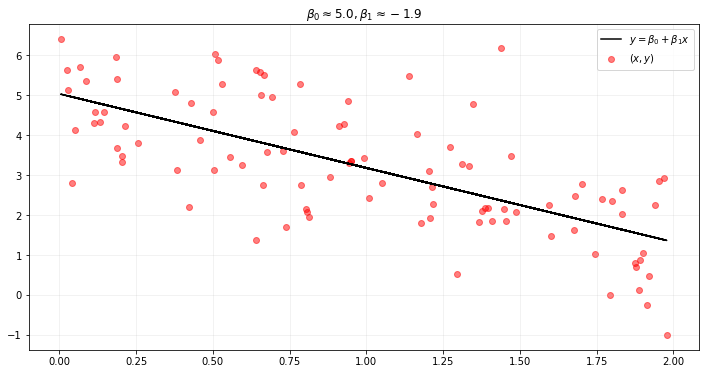

In [80]:
bhat = np.squeeze( mdl.beta )

titleStr = r'$\beta_0 \approx {:.1f}, \beta_1 \approx {:.1f}$'.format(
    float(bhat[0]),
    float(bhat[1])
)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, color='red', alpha=0.5, label=r'$(x, y)$')
ax.plot(x, np.polyval(np.flip(bhat), x), color='black', label=r'$y=\beta_0+\beta_1x$')
ax.grid(alpha=0.2)
ax.set_title(titleStr)
ax.legend()
plt.show()

## Conclusion

We have essentially reconstructed a Matlab-like environment in Python by assembling our own [stack](https://en.wikipedia.org/wiki/Solution_stack).
With Python, we can approximate the behavior of many commercial software packages.
For example, with [Pandas](https://pandas.pydata.org/) and [Statsmodels](http://www.statsmodels.org/stable/) we can get closer to what R or Stata can do.
This shows a bit how flexible Python can be, and presents one argument in favor of using Python as main working tool.

In the next TA sessions we will not focus on Python anymore and we are going to do some Macroeconomics using Python as numerical tool.